In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline

In [60]:
df = pd.read_csv('wines.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [61]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [89]:
model = KMeans(2)
model.fit(df)
clusters = model.predict(df)
clusters

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [90]:
features = list(df.columns)

Lets look at the correlation strength of each feature

In [91]:
corrs = []
for feature in features:
    corr = abs(df[feature].corr(pd.Series(clusters)))
    corrs.append(corr)

corrs = pd.Series(corrs, index=features)
corrs.sort_values(ascending=False)

Proline                 0.862077
Flavanoids              0.582244
Total_Phenols           0.558312
Alcohol                 0.550067
OD280                   0.429785
Ash_Alcanity            0.410076
Nonflavanoid_Phenols    0.371490
Proanthocyanins         0.358525
Hue                     0.320386
Magnesium               0.307500
Malic_Acid              0.279495
Ash                     0.149840
Color_Intensity         0.133716
dtype: float64

In [92]:
df[clusters==0]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
21,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Down below is something called the elbow technique, this is where we can optimize or choice in the number of clusters by finding the elbow of the graph. The elbow is where the first sudden rise appears.

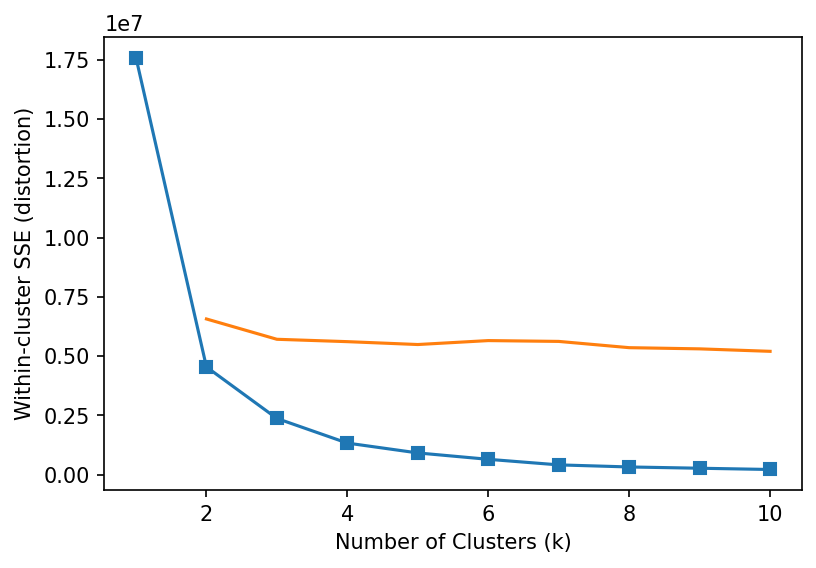

In [93]:
distortions = []
silhouettes = []
for k in range(1, 11):
    model = KMeans(k)
    model.fit(df[features])
    clusters = model.predict(df[features])
    distortions.append(model.inertia_)
    if k > 1:
        silhouette = silhouette_score(df[features], clusters)
        silhouettes.append(silhouette * 10000000)

plt.figure(dpi=150)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-cluster SSE (distortion)")
plt.plot(range(1,11), distortions, marker='s')
plt.plot(range(2,11), silhouettes)

The elbow appears to be at 3, so we should use 3 clusters. The silhouettes' y is off, just had to multiply by such a high number to see the shape of the line. 

In [94]:
data = PCA().fit_transform(df)
data

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

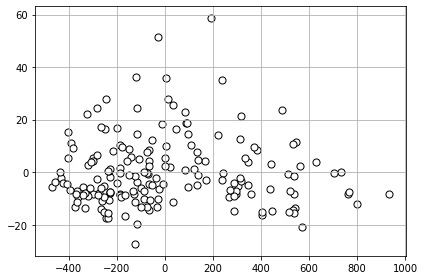

In [95]:
plt.scatter(data[:,0], data[:,1], c='white', marker='o', edgecolors='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [99]:
km = KMeans(n_clusters=3, init='random')
preds = km.fit_predict(data)

In [100]:
corrs = []
for feature in features:
    corr = abs(df[feature].corr(pd.Series(clusters)))
    corrs.append(corr)
corrs = pd.Series(corrs, index=features)
corrs.sort_values(ascending=False)

OD280                   0.053896
Total_Phenols           0.036186
Proanthocyanins         0.029091
Hue                     0.027091
Malic_Acid              0.026209
Proline                 0.021124
Color_Intensity         0.010116
Magnesium               0.009905
Ash                     0.007914
Ash_Alcanity            0.007198
Alcohol                 0.002536
Nonflavanoid_Phenols    0.001633
Flavanoids              0.001282
dtype: float64

Wow, correlations are very different from the beginning

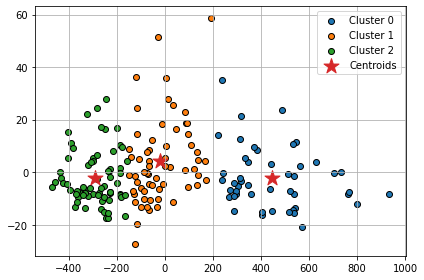

In [110]:
for i in range(3):
    plt.scatter(data[preds==i, 0], data[preds==i, 1], label='Cluster '+str(i), edgecolors='black', marker='o')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", label='Centroids')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

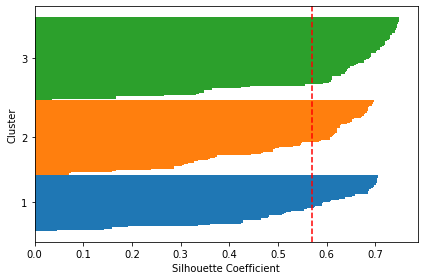

In [113]:
cluster_labels = np.unique(preds)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data, preds)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[preds==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = plt.jet()
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

This is a good sign of clustering because the silhouette coefficients are no where near 0. We are closer to one and all clusters are about even and not dispersed. 

In [121]:
silhouette_score(data, preds)

0.5711381937868838

In [116]:
km = KMeans(n_clusters=3, init='k-means++')
preds = km.fit_predict(data)

In [117]:
corrs = []
for feature in features:
    corr = abs(df[feature].corr(pd.Series(clusters)))
    corrs.append(corr)
corrs = pd.Series(corrs, index=features)
corrs.sort_values(ascending=False)

OD280                   0.053896
Total_Phenols           0.036186
Proanthocyanins         0.029091
Hue                     0.027091
Malic_Acid              0.026209
Proline                 0.021124
Color_Intensity         0.010116
Magnesium               0.009905
Ash                     0.007914
Ash_Alcanity            0.007198
Alcohol                 0.002536
Nonflavanoid_Phenols    0.001633
Flavanoids              0.001282
dtype: float64

It seems taht k-means++ and random have no difference on this dataset

From our findings of clusters, we can assume that these 3 wines could be made from different people, be 3 different types of wine, or there could be another explanation.